# Introduction

#### Coronavirus disease 2019 is an infectious disease caused by severe acute respiratory syndrome coronavirus 2. It was first identified in December 2019 in Wuhan, China, and has since spread globally, resulting in an ongoing pandemic.

> Source : [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus_disease_2019)

#### This notebook's objective is to understand the growth of the virus infection and perform an exploratory data analysis into covid data.

# Libraries

In [1]:
import pandas as pd                
import numpy as np                 
import matplotlib.pyplot as plt    

import seaborn as sns             
import os                         

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
covid_all = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
covid_all.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
# Checking for null values

print('Null values in dataset \n', covid_all.isnull().sum())

Null values in dataset 
 SNo                    0
ObservationDate        0
Province/State     18691
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [4]:
world = covid_all.copy()

In [5]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43721 entries, 0 to 43720
Data columns (total 8 columns):
SNo                43721 non-null int64
ObservationDate    43721 non-null object
Province/State     25030 non-null object
Country/Region     43721 non-null object
Last Update        43721 non-null object
Confirmed          43721 non-null float64
Deaths             43721 non-null float64
Recovered          43721 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.7+ MB


In [6]:
world['ObservationDate']=pd.to_datetime(world['ObservationDate'])
world.set_index('ObservationDate', inplace=True)
world.drop(columns=['SNo', 'Province/State', 'Last Update'], inplace=True)

In [7]:
world.index

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-06-16', '2020-06-16', '2020-06-16', '2020-06-16',
               '2020-06-16', '2020-06-16', '2020-06-16', '2020-06-16',
               '2020-06-16', '2020-06-16'],
              dtype='datetime64[ns]', name='ObservationDate', length=43721, freq=None)

In [8]:
world.head()

Country/Region  Confirmed  Deaths  Recovered
ObservationDate                                              
2020-01-22       Mainland China        1.0     0.0        0.0
2020-01-22       Mainland China       14.0     0.0        0.0
2020-01-22       Mainland China        6.0     0.0        0.0
2020-01-22       Mainland China        1.0     0.0        0.0
2020-01-22       Mainland China        0.0     0.0        0.0

In [9]:
new_cols = ['country', 'confirmed', 'deaths','recovered']
world.columns = new_cols
world.tail()

country  confirmed  deaths  recovered
ObservationDate                                              
2020-06-16               Mexico      560.0    62.0      335.0
2020-06-16              Ukraine     1726.0    42.0      706.0
2020-06-16              Ukraine      531.0    16.0      336.0
2020-06-16       Mainland China     1269.0     1.0     1267.0
2020-06-16              Ukraine     1101.0    20.0      559.0

# Country analysis based on latest date

In [10]:
# Details of covid cases on the max(latest) date of the data for each country
max_date = world.index.max()

country_max = world[world.index == max_date].groupby(['country']).agg({'confirmed':'sum', 
                                      'deaths':'sum', 'recovered':'sum'}).sort_values(['confirmed'], ascending=False)

In [11]:
country_max.head()

confirmed    deaths  recovered
country                                
US       2137731.0  116963.0   583503.0
Brazil    923189.0   45241.0   490005.0
Russia    544725.0    7274.0   293780.0
India     354065.0   11903.0   186935.0
UK        299600.0   42054.0     1293.0

In [12]:
# Top 5 countries this week for confirmed cases, death cases and recovery cases
top_5_confirmed = country_max.sort_values(['confirmed'],ascending=False)['confirmed'].head(5)
top_5_deaths = country_max.sort_values(['deaths'],ascending=False)['deaths'].head(5)
top_5_recovered = country_max.sort_values(['recovered'],ascending=False)['recovered'].head(5)

In [13]:
# Last week Date
last_week = max_date - pd.Timedelta(days=7)

country_last_week = world[world.index == last_week].groupby(['country']).agg({'confirmed':'sum', 
                                      'deaths':'sum', 'recovered':'sum'}).sort_values(['confirmed'], ascending=False)

# Top 5 countries last week for confirmed cases, death cases and recovery cases

top_5_confirmed_last_week = country_last_week.sort_values(['confirmed'],ascending=False)['confirmed'].head(5)
top_5_deaths_last_week = country_last_week.sort_values(['deaths'],ascending=False)['deaths'].head(5)
top_5_recovered_last_week = country_last_week.sort_values(['recovered'],ascending=False)['recovered'].head(5)

## Top 5 Countries with highest confirmed cases and death cases this week

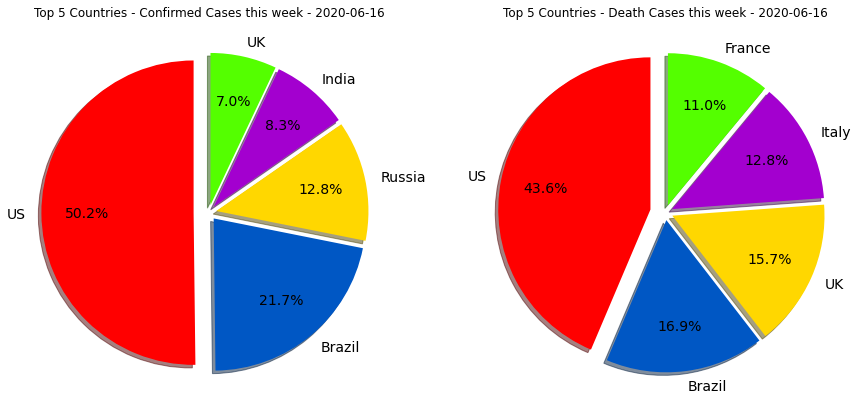

In [14]:
# Country based - Highest confirmed cases, death cases this week 
fig, ax = plt.subplots(1, 2, figsize=(15,10))

cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., top_5_confirmed.shape[0]))

ax[0].pie(top_5_confirmed.values, labels = top_5_confirmed.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[0].set_title('Top 5 Countries - Confirmed Cases this week - {}'.format(max_date.date()))

ax[1].pie(top_5_deaths.values, labels = top_5_deaths.index, startangle = 90, 
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[1].set_title('Top 5 Countries - Death Cases this week - {}'.format(max_date.date()))

plt.show()

## Top 5 Countries with highest confirmed cases and death cases last week

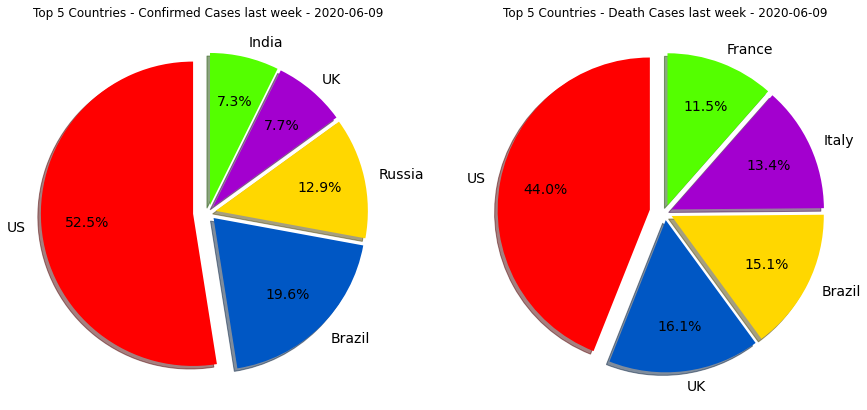

In [15]:
# Country based - Highest confirmed cases, death cases last week
fig, ax = plt.subplots(1, 2, figsize=(15,10))

cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., top_5_confirmed_last_week .shape[0]))

ax[0].pie(top_5_confirmed_last_week.values, labels = top_5_confirmed_last_week.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[0].set_title('Top 5 Countries - Confirmed Cases last week - {}'.format(last_week.date()))

ax[1].pie(top_5_deaths_last_week.values, labels = top_5_deaths_last_week.index, startangle = 90, 
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[1].set_title('Top 5 Countries - Death Cases last week - {}'.format(last_week.date()))

plt.show()

# Comparing Highest Confirmed cases last week and this week 

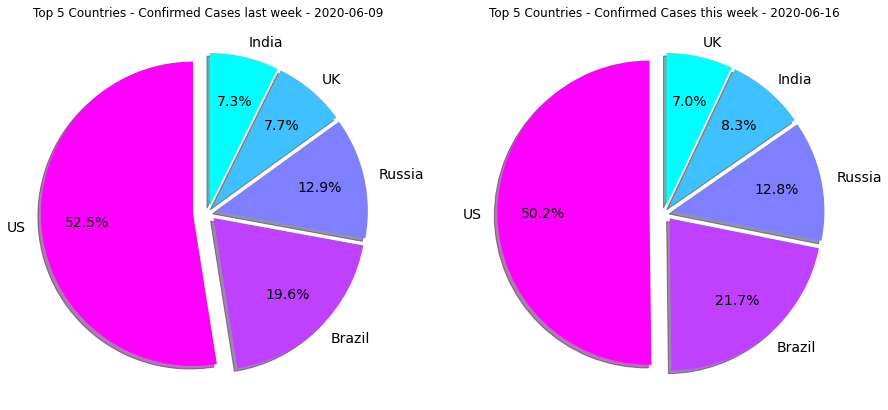

In [16]:
# Country based - Comparing Highest Confirmed cases last week and this week

fig, ax = plt.subplots(1, 2, figsize=(15,10))

cmap = plt.cm.cool_r
colors = cmap(np.linspace(0., 1., top_5_confirmed_last_week.shape[0]))

ax[0].pie(top_5_confirmed_last_week.values, labels = top_5_confirmed_last_week.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[0].set_title('Top 5 Countries - Confirmed Cases last week - {}'.format(last_week.date()))

ax[1].pie(top_5_confirmed.values, labels = top_5_confirmed.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[1].set_title('Top 5 Countries - Confirmed Cases this week - {}'.format(max_date.date()))


plt.show()

In [17]:
print('Top 5 Countries with highest confirmed cases last week (date) {} - \n {} \n'
      .format(last_week, top_5_confirmed_last_week.index.values))
print('Top 5 Countries with highest confirmed cases this week (date) {} - \n {}'
      .format(max_date, top_5_confirmed.index.values))

Top 5 Countries with highest confirmed cases last week (date) 2020-06-09 00:00:00 - 
 ['US' 'Brazil' 'Russia' 'UK' 'India'] 

Top 5 Countries with highest confirmed cases this week (date) 2020-06-16 00:00:00 - 
 ['US' 'Brazil' 'Russia' 'India' 'UK']


# Comparing Highest Death cases last week and this week 

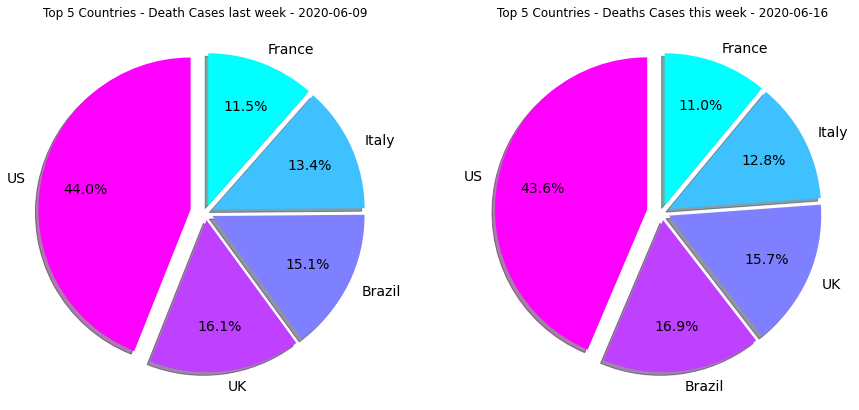

In [18]:
# Country based - Comparing Highest Death cases last week and this week

fig, ax = plt.subplots(1, 2, figsize=(15,10))

cmap = plt.cm.cool_r
colors = cmap(np.linspace(0., 1., top_5_deaths_last_week.shape[0]))

ax[0].pie(top_5_deaths_last_week.values, labels = top_5_deaths_last_week.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[0].set_title('Top 5 Countries - Death Cases last week - {}'.format(last_week.date()))

ax[1].pie(top_5_deaths.values, labels = top_5_deaths.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[1].set_title('Top 5 Countries - Deaths Cases this week - {}'.format(max_date.date()))

plt.show()

In [19]:
print('Top 5 Countries with highest death cases last week (date) {} -  \n {} \n'
      .format(last_week, top_5_deaths_last_week.index.values))
print('Top 5 Countries with highest death cases this week (date) {} -  \n {}'
      .format(max_date, top_5_deaths.index.values))

Top 5 Countries with highest death cases last week (date) 2020-06-09 00:00:00 -  
 ['US' 'UK' 'Brazil' 'Italy' 'France'] 

Top 5 Countries with highest death cases this week (date) 2020-06-16 00:00:00 -  
 ['US' 'Brazil' 'UK' 'Italy' 'France']


# Comparing Highest Recovered cases last week and this week

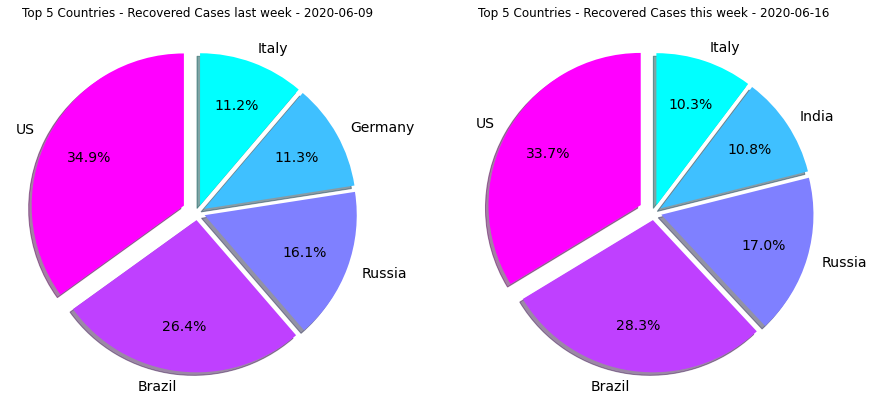

In [20]:
# Country based - Comparing Highest Recovered cases last week and this week

fig, ax = plt.subplots(1, 2, figsize=(15,10))

cmap = plt.cm.cool_r
colors = cmap(np.linspace(0., 1., top_5_recovered_last_week.shape[0]))

ax[0].pie(top_5_recovered_last_week.values, labels = top_5_recovered_last_week.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[0].set_title('Top 5 Countries - Recovered Cases last week - {}'.format(last_week.date()))

ax[1].pie(top_5_recovered.values, labels = top_5_recovered.index, startangle = 90,
        autopct='%1.1f%%', explode = [0.1, 0.05, 0.05, 0.05, 0.05], pctdistance=0.7, 
        shadow = True, textprops={'fontsize': 14}, colors=colors)

ax[1].set_title('Top 5 Countries - Recovered Cases this week - {}'.format(max_date.date()))

plt.show()

In [21]:
print('Top 5 Countries with highest recovery cases last week (date) {} - \n {} \n'
      .format(last_week, top_5_recovered_last_week.index.values))
print('Top 5 Countries with highest recovery cases this week (date) {} - \n {}'
      .format(max_date, top_5_recovered.index.values))

Top 5 Countries with highest recovery cases last week (date) 2020-06-09 00:00:00 - 
 ['US' 'Brazil' 'Russia' 'Germany' 'Italy'] 

Top 5 Countries with highest recovery cases this week (date) 2020-06-16 00:00:00 - 
 ['US' 'Brazil' 'Russia' 'India' 'Italy']


## Case Fatality Rate and Recovery Rate of countries

### Calculating Case Fatality Rate is tricky in an ongoing epidemic.

References :

- [Science. The Wire - Case Fatality Rate Calculation](https://science.thewire.in/the-sciences/covid-19-pandemic-case-fatality-rate-calculation/)
- [MedicalNewsToday - Why are Covid19 death rates hard to calculate](https://www.medicalnewstoday.com/articles/why-are-covid-19-death-rates-so-hard-to-calculate-experts-weigh-in#Why-calculating-the-death-rate-is-so-tricky)
- [What do we know about the risk of dying from Covid19](https://ourworldindata.org/covid-mortality-risk)


In [22]:
# Case Fatality Rate and Recovery of each country
country_max['cfr'] = np.where((country_max['confirmed'] > 1000) , 
                                (country_max['deaths']/country_max['confirmed']), 0)
country_max['recovery'] = np.where((country_max['confirmed'] > 1000) , 
                                     (country_max['recovered']/country_max['confirmed']), 0)

## Countries with Highest Case Fatality Rates

In [23]:
# Countries with highest CFR rates
top_cfr = country_max.sort_values(['cfr'],ascending=False)['cfr'].head(7)

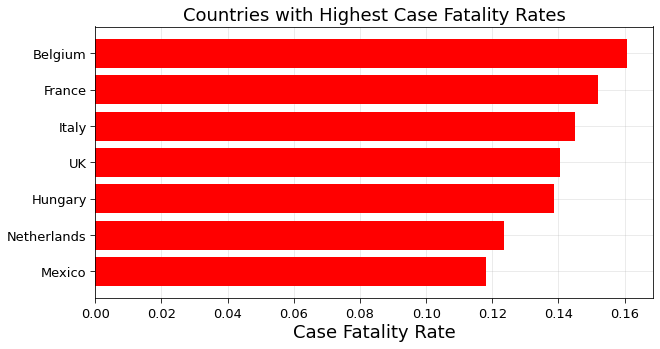

In [24]:
plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(top_cfr.index, top_cfr.values,color='red')
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel('Case Fatality Rate', fontsize=18)
plt.title('Countries with Highest Case Fatality Rates', fontsize=18)
plt.grid(alpha=0.3)

In [25]:
# Top countries with highest recovery rates
top_recovery = country_max.sort_values(['recovery'],ascending=False)['recovery'].head(7)

## Top Countries with Highest Recovery Rate

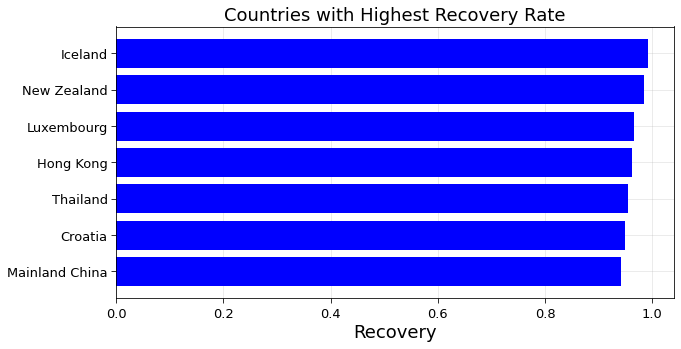

In [26]:
plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(top_recovery.index, top_recovery.values,color='blue')
plt.gca().invert_yaxis()
plt.tick_params(size=5, labelsize = 13)
plt.xlabel('Recovery', fontsize=18)
plt.title('Countries with Highest Recovery Rate', fontsize=18)
plt.grid(alpha=0.3)

In [27]:
print('Top Countries with highest case fatality rates are -  \n {} \n'.format(top_cfr.index.values))
print('Top Countries with highest recovery rates are   \n {}'.format(top_recovery.index.values))

Top Countries with highest case fatality rates are -  
 ['Belgium' 'France' 'Italy' 'UK' 'Hungary' 'Netherlands' 'Mexico'] 

Top Countries with highest recovery rates are   
 ['Iceland' 'New Zealand' 'Luxembourg' 'Hong Kong' 'Thailand' 'Croatia'
 'Mainland China']


 # Country based Daily Cases analysis

In [28]:
country_daily = world.groupby(['country', world.index]).agg({'confirmed':'sum', 
                                      'deaths':'sum', 'recovered':'sum'})

In [29]:
country_daily.head()

confirmed  deaths  recovered
country         ObservationDate                              
 Azerbaijan     2020-02-28             1.0     0.0        0.0
('St. Martin',) 2020-03-10             2.0     0.0        0.0
Afghanistan     2020-02-24             1.0     0.0        0.0
                2020-02-25             1.0     0.0        0.0
                2020-02-26             1.0     0.0        0.0

In [30]:
country_daily.shape


(20021, 3)

# Analysis of cases in India

In [31]:
India_daily = country_daily.loc['India']
India_daily.shape

(139, 3)

In [32]:
India_daily.head()

confirmed  deaths  recovered
ObservationDate                              
2020-01-30             1.0     0.0        0.0
2020-01-31             1.0     0.0        0.0
2020-02-01             1.0     0.0        0.0
2020-02-02             2.0     0.0        0.0
2020-02-03             3.0     0.0        0.0

## Plotting daily Confirmed and Death Cases in India

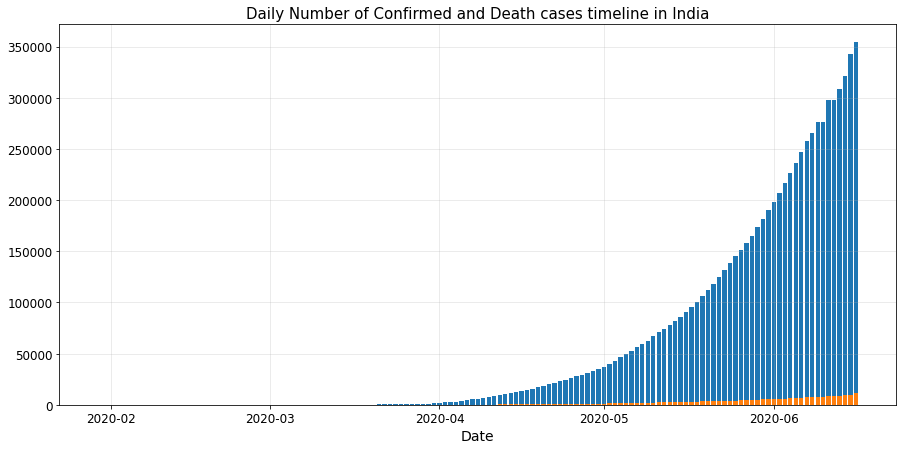

In [33]:
plt.figure(figsize=(15,7))
plt.title('Daily Number of Confirmed and Death cases timeline in India', fontsize=15)
plt.bar(India_daily.index, India_daily['confirmed'])
plt.bar(India_daily.index, India_daily['deaths'])
plt.xlabel('Date', fontsize=14)
plt.tick_params(labelsize = 12)
plt.grid(alpha=0.3)
plt.show()

## Weekly Confirmed cases in India vs Other Top countries

In [34]:
def create_weekly_interpolate(country, from_df):
    country_df = country + 'week_df'
    country_df = from_df.loc[country]
    country_df = country_df.interpolate()[::7]
    return country_df

In [35]:
India_week_df = create_weekly_interpolate('India', country_daily)

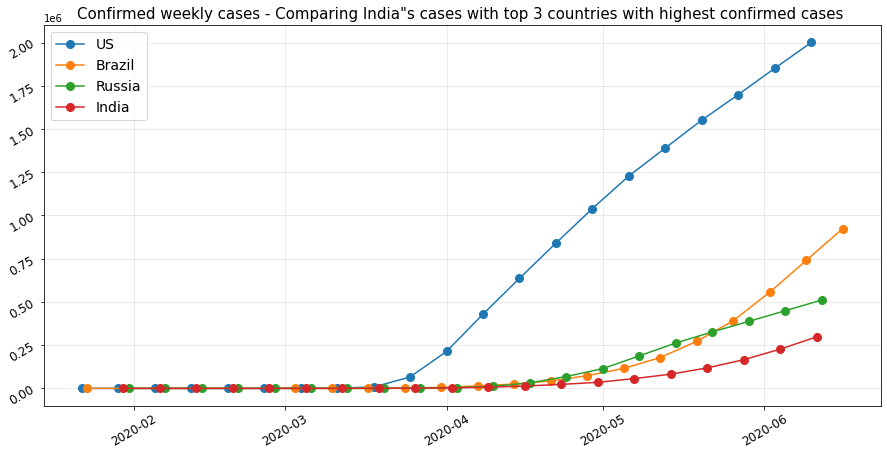

In [36]:
plt.figure(figsize=(15,7))

for country in top_5_confirmed.index[:3]:
    df = create_weekly_interpolate(country, country_daily)
    plt.plot_date(df.index, df['confirmed'], 'o-', label=country, markersize=8 )

plt.plot_date(India_week_df.index, India_week_df['confirmed'], 'o-', label='India', markersize=8 )
plt.title('Confirmed weekly cases - Comparing India"s cases with top 3 countries with highest confirmed cases ', 
          fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12, labelrotation=30)
plt.grid(alpha=0.3)
plt.show()

## Weekly Death cases in India vs Other Top countries

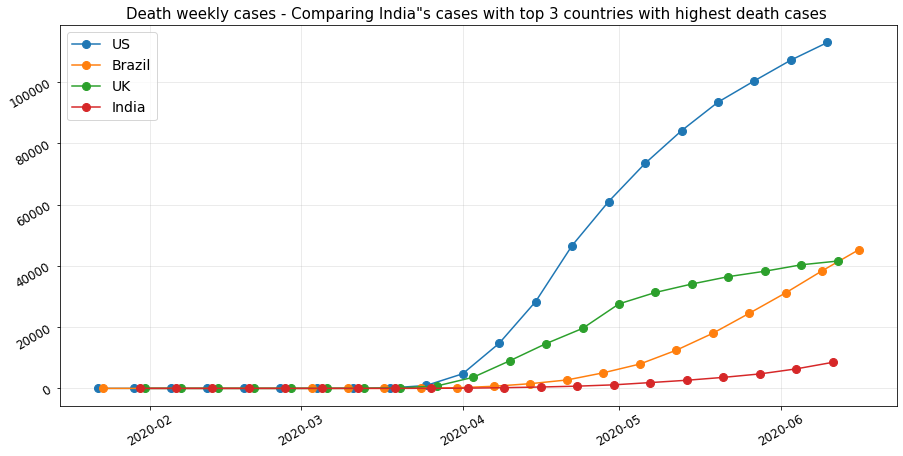

In [37]:
plt.figure(figsize=(15,7))

for country in top_5_deaths.index[:3]:
    df = create_weekly_interpolate(country, country_daily)
    plt.plot_date(df.index, df['deaths'], 'o-', label=country, markersize=8 )

plt.plot_date(India_week_df.index, India_week_df['deaths'], 'o-', label='India', markersize=8 )
plt.title('Death weekly cases - Comparing India"s cases with top 3 countries with highest death cases ', fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12, labelrotation=30)
plt.grid(alpha=0.3)
plt.show()

## Weekly Recovery cases in India vs Other Top countries

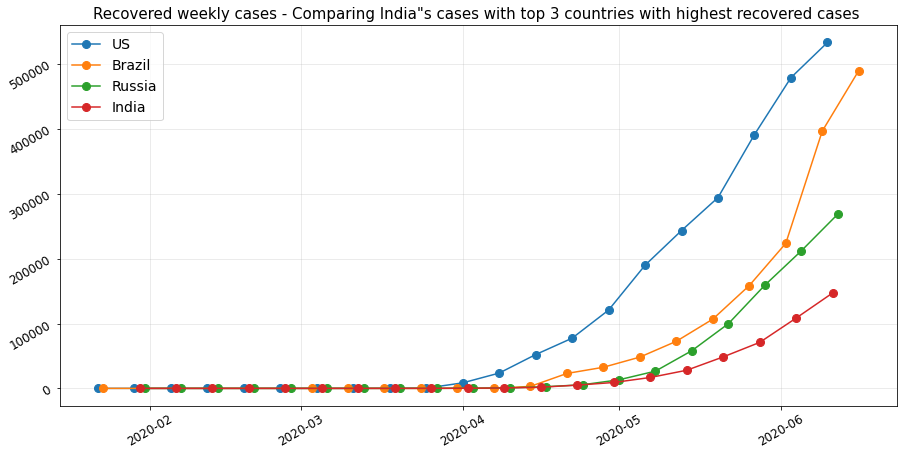

In [38]:
plt.figure(figsize=(15,7))

for country in top_5_recovered.index[:3]:
    df = create_weekly_interpolate(country, country_daily)
    plt.plot_date(df.index, df['recovered'], 'o-', label=country, markersize=8 )

plt.plot_date(India_week_df.index, India_week_df['recovered'], 'o-', label='India', markersize=8 )
plt.title('Recovered weekly cases - Comparing India"s cases with top 3 countries with highest recovered cases ', 
          fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12, labelrotation=30)
plt.grid(alpha=0.3)
plt.show()

## Weekly Confirmed, Death and Recovered cases in India

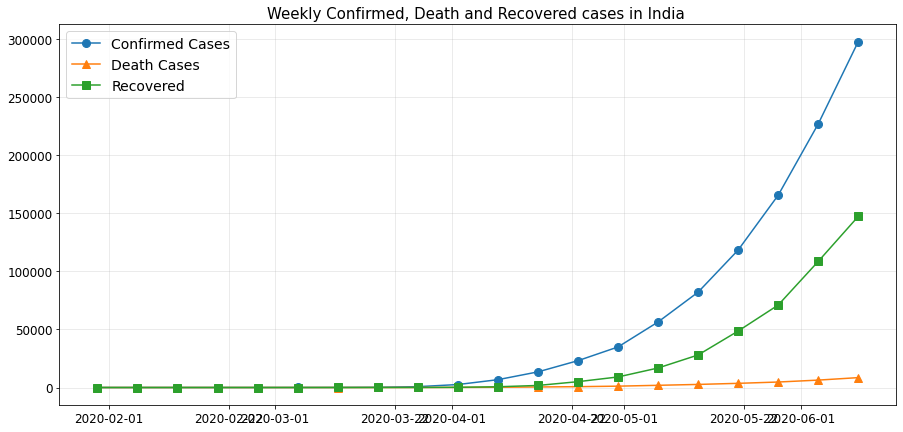

In [39]:
plt.figure(figsize=(15,7))

plt.plot_date(India_week_df.index, India_week_df['confirmed'], 'o-', label='Confirmed Cases', markersize=8)
plt.plot_date(India_week_df.index, India_week_df['deaths'], '^-', label='Death Cases', markersize=8)
plt.plot_date(India_week_df.index, India_week_df['recovered'], 's-', label='Recovered', markersize=8)

plt.title('Weekly Confirmed, Death and Recovered cases in India ', fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12)
plt.grid(alpha=0.3)
plt.show()

## Compare Confirmed Cases in India vs World

In [40]:
world_daily = world.groupby(world.index)['confirmed', 'deaths', 'recovered'].sum()
world_daily.head()

confirmed  deaths  recovered
ObservationDate                              
2020-01-22           555.0    17.0       28.0
2020-01-23           653.0    18.0       30.0
2020-01-24           941.0    26.0       36.0
2020-01-25          1438.0    42.0       39.0
2020-01-26          2118.0    56.0       52.0

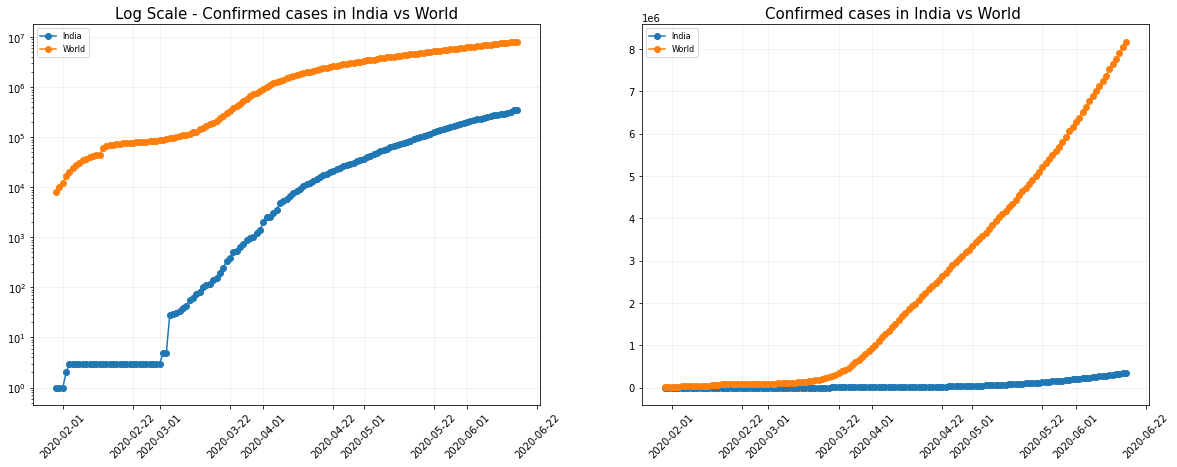

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))

ax[0].plot_date(India_daily.index, India_daily['confirmed'], 'o-', label='India')
ax[0].plot_date(world_daily.index[8:], world_daily['confirmed'][8:], 'o-', label='World')
ax[0].set_yscale('log')
ax[0].tick_params(axis='x', rotation=45, labelsize = 10)
ax[0].set_title('Log Scale - Confirmed cases in India vs World', fontsize=15)
ax[0].grid(alpha=0.2)
ax[0].legend(prop={'size': 8})

ax[1].plot_date(India_daily.index, India_daily['confirmed'], 'o-', label='India')
ax[1].plot_date(world_daily.index[8:], world_daily['confirmed'][8:], 'o-', label='World')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Confirmed cases in India vs World ', fontsize=15)
ax[1].grid(alpha=0.2)
ax[1].legend(prop={'size': 8})

plt.show()

### India is following the same growth pattern in terms of increasing cases

## Compare Death Cases in India vs World

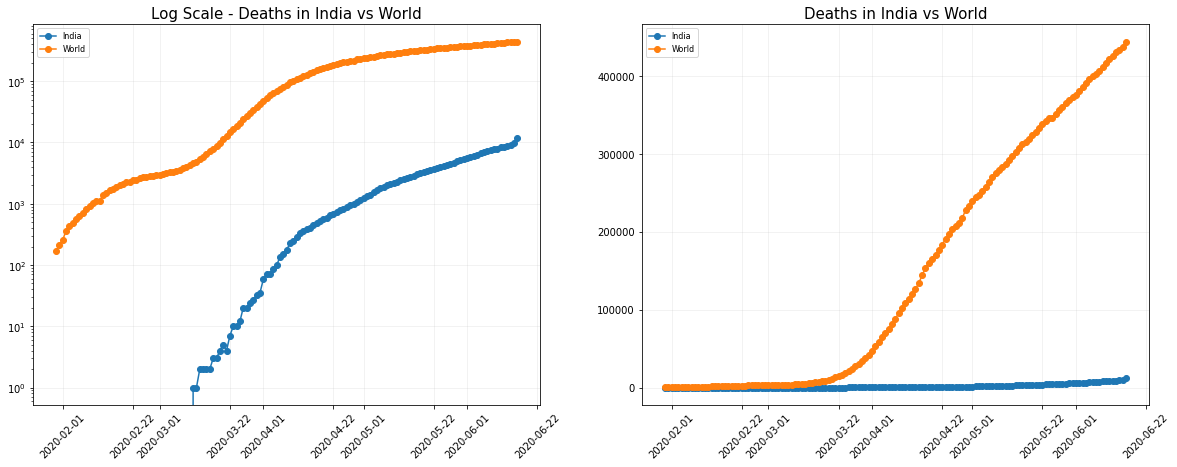

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))

ax[0].plot_date(India_daily.index, India_daily['deaths'], 'o-', label='India')
ax[0].plot_date(world_daily.index[8:], world_daily['deaths'][8:], 'o-', label='World')
ax[0].set_yscale('log')
ax[0].tick_params(axis='x', rotation=45, labelsize = 10)
ax[0].set_title('Log Scale - Deaths in India vs World', fontsize=15)
ax[0].grid(alpha=0.2)
ax[0].legend(prop={'size': 8})

ax[1].plot_date(India_daily.index, India_daily['deaths'], 'o-', label='India')
ax[1].plot_date(world_daily.index[8:], world_daily['deaths'][8:], 'o-', label='World')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Deaths in India vs World', fontsize=15)
ax[1].grid(alpha=0.2)
ax[1].legend(prop={'size': 8})

plt.show()

## Case Fatality Rate - India vs World

In [43]:
# Case Fatality Rate, New Cases and Growth Factor 
world_daily['cfr'] = (world_daily['deaths']/world_daily['confirmed']).replace(np.inf, 0)

In [44]:
world_daily.head()

confirmed  deaths  recovered       cfr
ObservationDate                                        
2020-01-22           555.0    17.0       28.0  0.030631
2020-01-23           653.0    18.0       30.0  0.027565
2020-01-24           941.0    26.0       36.0  0.027630
2020-01-25          1438.0    42.0       39.0  0.029207
2020-01-26          2118.0    56.0       52.0  0.026440

In [45]:
India_daily['cfr'] = (India_daily['deaths']/India_daily['confirmed']).replace(np.inf, 0)
India_daily.head()

confirmed  deaths  recovered  cfr
ObservationDate                                   
2020-01-30             1.0     0.0        0.0  0.0
2020-01-31             1.0     0.0        0.0  0.0
2020-02-01             1.0     0.0        0.0  0.0
2020-02-02             2.0     0.0        0.0  0.0
2020-02-03             3.0     0.0        0.0  0.0

In [46]:
world_daily.tail()

confirmed    deaths  recovered       cfr
ObservationDate                                          
2020-06-12       7632802.0  425394.0  3613277.0  0.055732
2020-06-13       7766952.0  429736.0  3698304.0  0.055329
2020-06-14       7900924.0  433066.0  3769712.0  0.054812
2020-06-15       8034504.0  436899.0  3857339.0  0.054378
2020-06-16       8173940.0  443685.0  3955169.0  0.054280

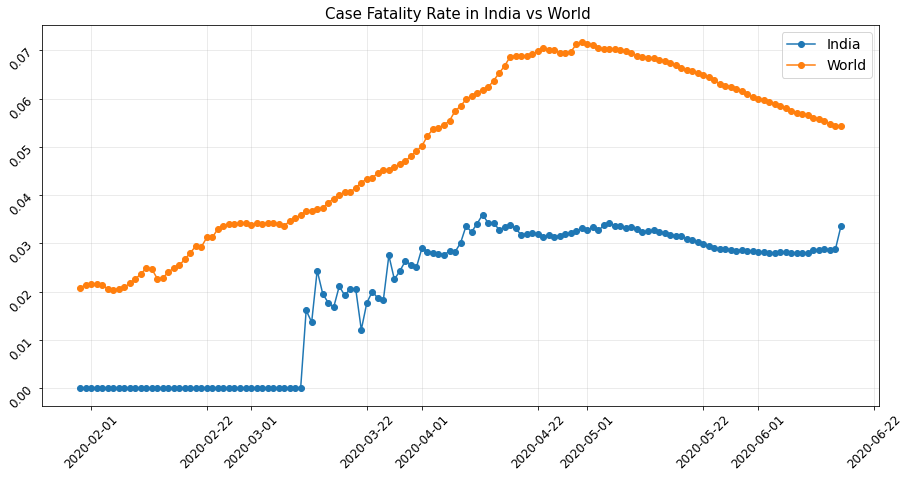

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

ax.plot_date(India_daily.index, India_daily['cfr'], 'o-', label='India')
ax.plot_date(world_daily.index[8:], world_daily['cfr'][8:], 'o-', label='World')
plt.title('Case Fatality Rate in India vs World ', fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12, labelrotation=45)
plt.grid(alpha=0.3)
plt.show()

## Growth factor:

It is the number by which a quantity multiplies itself over time. The growth factor is the ratio of the number of cases one day divided by the number of new cases the previous day.

**1. Growth factor > 1 : Indicates an increase in correspoding cases**

**2. Growth factor < 1 : Indicates correspoding cases are decreasing**

**3. Growth factor constant approx = 1 :  indicates there is no change in correspoding cases**

References :

* [3Blue1Brown - Exponential growth and epidemics](https://www.youtube.com/watch?v=Kas0tIxDvrg)
* [Kaggle Notebook - Covid-19 Predictions, Growth Factor, and Calculus](https://www.kaggle.com/dferhadi/covid-19-predictions-growth-factor-and-calculus#The-Math:-Exponential-vs-Logistic)
* [WorldOMeters - Growth Factor of Daily New Cases](https://www.worldometers.info/coronavirus/coronavirus-cases/#cases-growth-factor)

In [48]:
world_daily['new_cases'] = world_daily['confirmed'] - world_daily['confirmed'].shift(1)
world_daily['growth_factor'] = world_daily['new_cases'] / world_daily['new_cases'].shift(1)
world_daily.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
world_daily.head()

confirmed  deaths  recovered       cfr  new_cases  \
ObservationDate                                                      
2020-01-22           555.0    17.0       28.0  0.030631        0.0   
2020-01-23           653.0    18.0       30.0  0.027565       98.0   
2020-01-24           941.0    26.0       36.0  0.027630      288.0   
2020-01-25          1438.0    42.0       39.0  0.029207      497.0   
2020-01-26          2118.0    56.0       52.0  0.026440      680.0   

                 growth_factor  
ObservationDate                 
2020-01-22            0.000000  
2020-01-23            0.000000  
2020-01-24            2.938776  
2020-01-25            1.725694  
2020-01-26            1.368209

In [49]:
India_daily['new_cases'] = India_daily['confirmed'] - India_daily['confirmed'].shift(1)
India_daily['growth_factor'] = India_daily['new_cases'] / India_daily['new_cases'].shift(1)
India_daily.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
India_daily.tail()

confirmed   deaths  recovered       cfr  new_cases  \
ObservationDate                                                       
2020-06-12        297535.0   8498.0   147195.0  0.028561        0.0   
2020-06-13        308993.0   8884.0   154330.0  0.028751    11458.0   
2020-06-14        320922.0   9195.0   162379.0  0.028652    11929.0   
2020-06-15        343091.0   9900.0   180013.0  0.028855    22169.0   
2020-06-16        354065.0  11903.0   186935.0  0.033618    10974.0   

                 growth_factor  
ObservationDate                 
2020-06-12            0.000000  
2020-06-13            0.000000  
2020-06-14            1.041107  
2020-06-15            1.858412  
2020-06-16            0.495016

## Growth Factor of confirmed cases in India

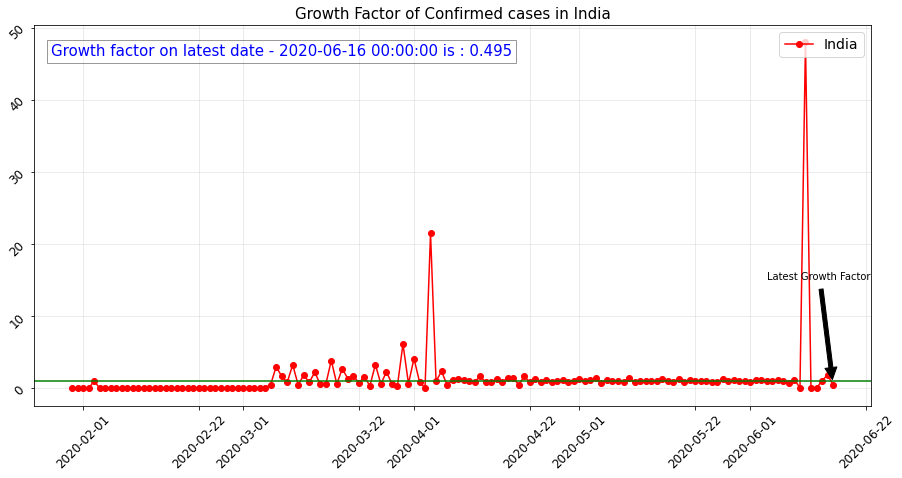

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
date_last = India_daily.index.max()
growth_last = India_daily['growth_factor'][-1]

ax.plot_date(India_daily.index, India_daily['growth_factor'], 'o-', label='India', color='red')

ax.annotate('Latest Growth Factor ', 
            xy=(date_last, growth_last),  xytext=(India_daily.index.max() - pd.Timedelta(days=12), 15),
            arrowprops=dict(facecolor='black', shrink=0.05))

text = 'Growth factor on latest date - {} is : {}'.format(date_last, np.round(growth_last, 3))
plt.text(0.02, 0.95, text, fontsize=15, horizontalalignment='left', verticalalignment='top', color ='blue',
         transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
plt.axhline(y=1, color='green')
plt.title('Growth Factor of Confirmed cases in India', fontsize=15)
plt.legend(loc='upper right', prop={'size': 14})
plt.tick_params(labelsize = 12, labelrotation=45)
plt.grid(alpha=0.3)
plt.show()

## Growth Factor of confirmed cases in the World

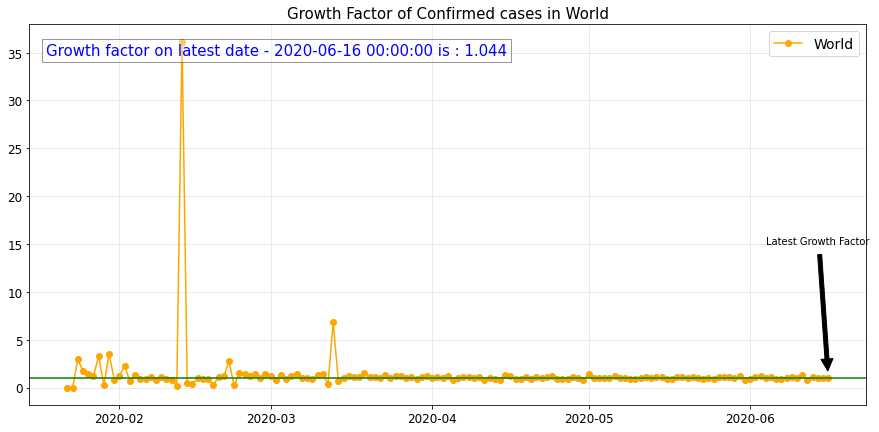

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
date_last = world_daily.index.max()
growth_last = world_daily['growth_factor'][-1]

ax.plot_date(world_daily.index, world_daily['growth_factor'], 'o-', label='World', color='orange')

ax.annotate('Latest Growth Factor ', 
            xy=(date_last, growth_last),  xytext=(world_daily.index.max() - pd.Timedelta(days=12), 15),
            arrowprops=dict(facecolor='black', shrink=0.05))

text = 'Growth factor on latest date - {} is : {}'.format(date_last, np.round(growth_last, 3))
plt.text(0.02, 0.95, text, fontsize=15, horizontalalignment='left', verticalalignment='top', color ='blue',
         transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
plt.axhline(y=1, color='green')
plt.title('Growth Factor of Confirmed cases in World', fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12)
plt.grid(alpha=0.3)
plt.show()

## New Cases vs Cumulative Confirmed Cases on log scale

In [52]:
# Case Fatality Rate, New Cases and Growth Factor 

def create_growth_df(country, from_df):
    country_df = country + 'daily'
    country_df = from_df.loc[country]
    country_df['cfr'] = (country_df['deaths']/country_df['confirmed'])
    country_df['new_cases'] = country_df['confirmed'] - country_df['confirmed'].shift(1)
    country_df['growth_factor'] = country_df['new_cases'] / country_df['new_cases'].shift(1)
    country_df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    return country_df

In [53]:
top_5_confirmed

country
US        2137731.0
Brazil     923189.0
Russia     544725.0
India      354065.0
UK         299600.0
Name: confirmed, dtype: float64

## India's Curve - New Cases vs Cumulative Cases - Exponential Graph

References :
* [How To Tell If We're Beating COVID-19](https://www.youtube.com/watch?v=54XLXg4fYsc)
* [CovidTrends](https://aatishb.com/covidtrends/)


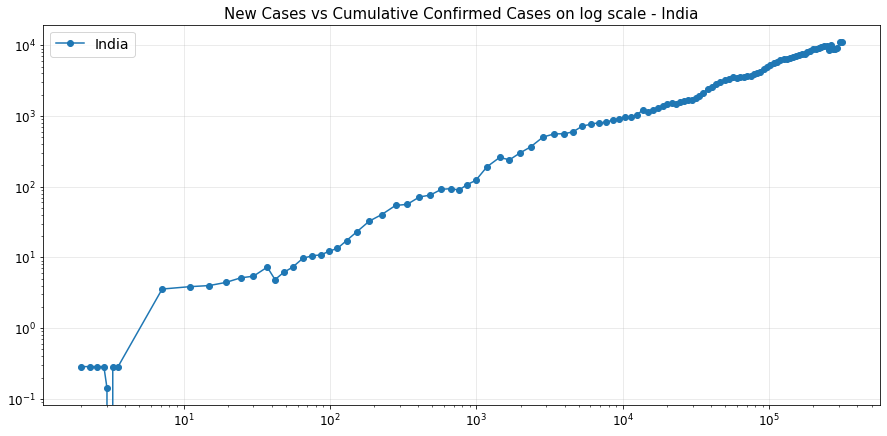

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
rolling_confirmed = India_daily['confirmed'].rolling(window=7).mean()
rolling_new_cases = India_daily['new_cases'].rolling(window=7).mean()

plt.plot(rolling_confirmed, rolling_new_cases, 'o-', label='India')

ax.set_xscale('log')
ax.set_yscale('log')
plt.title('New Cases vs Cumulative Confirmed Cases on log scale - India', fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12)
plt.grid(alpha=0.3)
plt.show()

In [55]:
top_cases_countries = set(top_5_confirmed.index)
top_cases_countries.update(top_5_deaths.index)
top_cases_countries.add('Mainland China')
top_cases_countries.add('Spain')
top_cases_countries

{'Brazil',
 'France',
 'India',
 'Italy',
 'Mainland China',
 'Russia',
 'Spain',
 'UK',
 'US'}

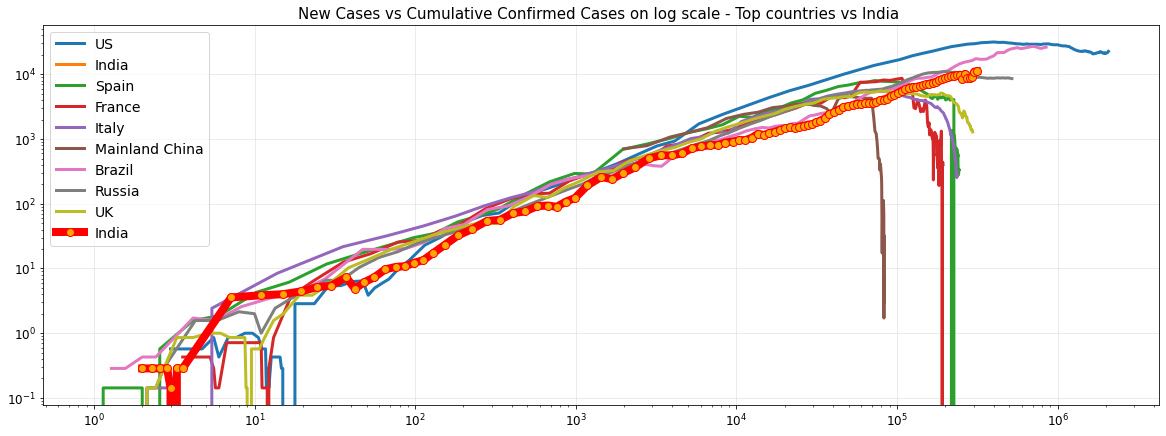

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(20,7))

for country in top_cases_countries:
    df = create_growth_df(country, country_daily)
    
    rolling_confirmed = df['confirmed'].rolling(window=7).mean()
    rolling_new_cases = df['new_cases'].rolling(window=7).mean()

    plt.plot(rolling_confirmed, rolling_new_cases, label=country, linewidth=3, 
         linestyle='-', markersize=3)

if 'India' in top_cases_countries:
    top_cases_countries.remove('India')
rolling_confirmed = India_daily['confirmed'].rolling(window=7).mean()
rolling_new_cases = India_daily['new_cases'].rolling(window=7).mean()
plt.plot(rolling_confirmed, rolling_new_cases, label='India', c="red",linewidth=8, 
         linestyle='-', marker='o', markersize=8, markerfacecolor='orange')

ax.set_xscale('log')
ax.set_yscale('log')
plt.title('New Cases vs Cumulative Confirmed Cases on log scale - Top countries vs India ', fontsize=15)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize = 12)
plt.grid(alpha=0.3)
plt.show()

#### The exponential growth is represented as a straight line that slopes upwards. Almost all countries follow a very similar path of exponential growth. Only when the graph line turns downwards - we have managed to contain the virus. ( Mainland China, France and Spain )

##### At this point India's cases are still growing and are yet to take a consistent downward trend.

## Prediction

In [57]:
import statsmodels.api as sm
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.neural_network import MLPRegressor
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go

In [58]:
df = pd.DataFrame()
df['ds'] = India_daily.index
df['y'] = India_daily['confirmed'].values

Using Box-Cox Transform Reference:

* [Forecasting in Python with Prophet](https://mode.com/example-gallery/forecasting_prophet_python_cookbook/)

In [59]:
from fbprophet import Prophet
from scipy.stats import boxcox
# Apply Box-Cox Transform to value column and assign to new column y
df['y'], lam = boxcox(India_daily['confirmed'].values)

In [60]:
prophet_model = Prophet()

In [61]:
prophet_model.fit(df)

In [62]:
# For next 60 days
future = prophet_model.make_future_dataframe(periods=60)

In [63]:
forecast = prophet_model.predict(future)

In [64]:
from scipy.special import inv_boxcox

In [65]:
# Apply inverse Box-Cox transform to specific forecast columns
forecast[['yhat','yhat_upper','yhat_lower']] = forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))

In [66]:
import plotly.express as px
import plotly.io as pio

In [74]:
pio.templates.default = 'presentation'
pio.renderers.default = 'notebook'

In [78]:
fig = px.line(x=future['ds'], y=forecast.yhat)
fig.update_layout(title='Forecast for 3 months')
fig.show()

## The estimation is about ~4 million cases by Aug 1st.